In [1]:
%matplotlib inline
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/board1.jpg', 1) #利用灰階讀圖
#cv2.namedWindow('result', 0)
#cv2.resizeWindow('result', 640, 480)

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imwrite('gray.jpg', gray)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  #19-19+canny0-90感覺消很多
#cv2.imwrite('blurred.jpg', blurred)
canny = cv2.Canny(blurred, 0, 20)

In [3]:
kernel = np.ones((1, 20), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(canny,kernel,iterations = 1)

dst = 255 - dilation #反白
kernel = np.ones((50,50), np.uint8) 
morph_o = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel) #影象開運算-去除躁點

kernel = np.ones((1, 300), np.uint8) #設定卷積核 (高, 寬)
dilation = cv2.dilate(morph_o,kernel,iterations=1)

In [4]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),20)

    

array([[[68, 76, 83],
        [62, 70, 77],
        [58, 66, 73],
        ...,
        [15, 36, 81],
        [10, 29, 74],
        [13, 32, 77]],

       [[76, 84, 91],
        [70, 78, 85],
        [66, 74, 81],
        ...,
        [ 9, 30, 75],
        [ 8, 27, 72],
        [10, 29, 74]],

       [[72, 80, 87],
        [68, 76, 83],
        [64, 72, 79],
        ...,
        [ 5, 26, 71],
        [10, 29, 74],
        [ 8, 27, 72]],

       ...,

       [[25, 36, 66],
        [23, 34, 64],
        [24, 35, 65],
        ...,
        [28, 37, 46],
        [28, 38, 45],
        [10, 20, 27]],

       [[25, 36, 66],
        [23, 34, 64],
        [14, 25, 55],
        ...,
        [25, 34, 43],
        [19, 29, 36],
        [13, 23, 30]],

       [[ 5, 16, 46],
        [28, 39, 69],
        [28, 39, 69],
        ...,
        [26, 35, 44],
        [21, 31, 38],
        [17, 27, 34]]], dtype=uint8)

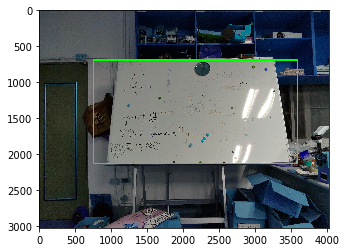

In [5]:

result = np.hstack([morph_o,dilation])
#cv2.imshow('result2', img)
#cv2.imshow('result', img)

#Show the image with matplotlib
plt.imshow(img)
plt.show()